In [2]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import csv

In [3]:
# csv permits file
csv_msa_permits = "output_data/texas_permits.csv"

# create df from csv, clean and display first rows
msa_permits = pd.read_csv(csv_msa_permits)
msa_permits.head()

,area,year,total permits
0,"Abilene, TX",2007,293
1,"Abilene, TX",2008,196
2,"Abilene, TX",2009,214
3,"Abilene, TX",2010,390
4,"Abilene, TX",2011,159


In [4]:
# csv population file
csv_msa_pop = "output_data/texas_population.csv"

# create df from csv, clean and display first rows
msa_pop = pd.read_csv(csv_msa_pop)
msa_pop.head()

,area,year,population
0,"Abilene, TX",2007,162023
1,"Abilene, TX",2008,162508
2,"Abilene, TX",2009,163888
3,"Abilene, TX",2010,165252
4,"Abilene, TX",2011,166633


In [5]:
# csv unemployment file
csv_msa_unemployment = "output_data/texas_unemployment.csv"

# create df from csv, clean and display first rows
msa_unemployment = pd.read_csv(csv_msa_unemployment)
msa_unemployment.head()

,area,year,unemployment rate
0,"Abilene, TX",2007,3.5373
1,"Abilene, TX",2008,3.7812
2,"Abilene, TX",2009,5.8180
3,"Abilene, TX",2010,6.9720
4,"Abilene, TX",2011,6.7516


In [6]:
# csv crime file
csv_msa_crime = "output_data/texas_crime_data.csv"

# create df from csv, clean and display first rows
texas_crime = pd.read_csv(csv_msa_crime)
texas_crime = texas_crime.rename(columns={"City":"area", "Year": "year", "Crime": "crime"})
texas_crime = texas_crime.drop("Unnamed: 0", axis = 1)
texas_crime.head()

,area,year,crime
0,"Austin-Round Rock, TX",2007,3983.0
1,"Austin-Round Rock, TX",2008,4063.0
2,"Austin-Round Rock, TX",2009,4152.0
3,"Austin-Round Rock, TX",2010,3906.0
4,"Austin-Round Rock, TX",2011,3586.0


In [7]:
# merge permits and population DataFrames
permits_population = pd.merge(msa_pop,msa_permits,on=["area","year"])
permits_population["population"].max()
permits_population.head()

,area,year,population,total permits
0,"Abilene, TX",2007,162023,293
1,"Abilene, TX",2008,162508,196
2,"Abilene, TX",2009,163888,214
3,"Abilene, TX",2010,165252,390
4,"Abilene, TX",2011,166633,159


In [8]:
# merge combined and unemployemnt DataFrames
perm_pop_unemploy = pd.merge(permits_population,msa_unemployment,on=["area","year"])
perm_pop_unemploy.head()

,area,year,population,total permits,unemployment rate
0,"Abilene, TX",2007,162023,293,3.5373
1,"Abilene, TX",2008,162508,196,3.7812
2,"Abilene, TX",2009,163888,214,5.8180
3,"Abilene, TX",2010,165252,390,6.9720
4,"Abilene, TX",2011,166633,159,6.7516


In [9]:
# Top 10 Metro Areas in our DF
top_10_df = perm_pop_unemploy.groupby('area', as_index=False)['population'].mean()
top_10_df = top_10_df.nlargest(10, 'population')

# list out top 10 areas
top_10_list = list(top_10_df["area"].unique()) 
combined_top_10 = perm_pop_unemploy[perm_pop_unemploy["area"].isin(top_10_df["area"].unique())]
combined_top_10.head()

,area,year,population,total permits,unemployment rate
22,"Austin-Round Rock, TX",2007,1577856,19903,3.6494
23,"Austin-Round Rock, TX",2008,1633870,11792,4.3054
24,"Austin-Round Rock, TX",2009,1682338,8758,6.9079
25,"Austin-Round Rock, TX",2010,1716289,8786,6.9947
26,"Austin-Round Rock, TX",2011,1780610,10239,6.5936


In [10]:
# Add crime data to top 10 cities
top_10_final = pd.merge(combined_top_10, texas_crime, on=["area","year"])
top_10_final.head()

,area,year,population,total permits,unemployment rate,crime
0,"Austin-Round Rock, TX",2007,1577856,19903,3.6494,3983.0
1,"Austin-Round Rock, TX",2008,1633870,11792,4.3054,4063.0
2,"Austin-Round Rock, TX",2009,1682338,8758,6.9079,4152.0
3,"Austin-Round Rock, TX",2010,1716289,8786,6.9947,3906.0
4,"Austin-Round Rock, TX",2011,1780610,10239,6.5936,3586.0


In [21]:
# Create a new DF with percentage change
top_10_final['population % change'] = ((top_10_final["population"] - top_10_final["population"].shift(+1)) / top_10_final["population"].shift(+1)).round(4)*100
top_10_final['total permits % change'] = ((top_10_final["total permits"] - top_10_final["total permits"].shift(+1)) / top_10_final["total permits"].shift(+1)).round(4)*100
top_10_final["persons per crime"] = round((top_10_final["population"]/top_10_final["crime"]))
top_10_final["crime per every 1000 person"] = ((top_10_final["crime"]/top_10_final["population"]*1000))
top_10_final.head()


,area,year,population,total permits,unemployment rate,crime,population % change,total permits % change,persons per crime,crime per persons,crime per every 1000 person
1,"Austin-Round Rock, TX",2008,1633870,11792,4.3054,4063.0,NaN,NaN,402.0,2.486734,2.486734
2,"Austin-Round Rock, TX",2009,1682338,8758,6.9079,4152.0,2.97,-25.73,405.0,2.467994,2.467994
3,"Austin-Round Rock, TX",2010,1716289,8786,6.9947,3906.0,2.02,0.32,439.0,2.275840,2.275840
4,"Austin-Round Rock, TX",2011,1780610,10239,6.5936,3586.0,3.75,16.54,497.0,2.013917,2.013917
5,"Austin-Round Rock, TX",2012,1834566,19595,5.6770,3546.0,3.03,91.38,517.0,1.932882,1.932882


In [23]:
# drop all rows with year 2007
top_10_final = top_10_final[top_10_final.year != 2007]
top_10_final.head()

,area,year,population,total permits,unemployment rate,crime,population % change,total permits % change,persons per crime,crime per persons,crime per every 1000 person
1,"Austin-Round Rock, TX",2008,1633870,11792,4.3054,4063.0,NaN,NaN,402.0,2.486734,2.486734
2,"Austin-Round Rock, TX",2009,1682338,8758,6.9079,4152.0,2.97,-25.73,405.0,2.467994,2.467994
3,"Austin-Round Rock, TX",2010,1716289,8786,6.9947,3906.0,2.02,0.32,439.0,2.275840,2.275840
4,"Austin-Round Rock, TX",2011,1780610,10239,6.5936,3586.0,3.75,16.54,497.0,2.013917,2.013917
5,"Austin-Round Rock, TX",2012,1834566,19595,5.6770,3546.0,3.03,91.38,517.0,1.932882,1.932882


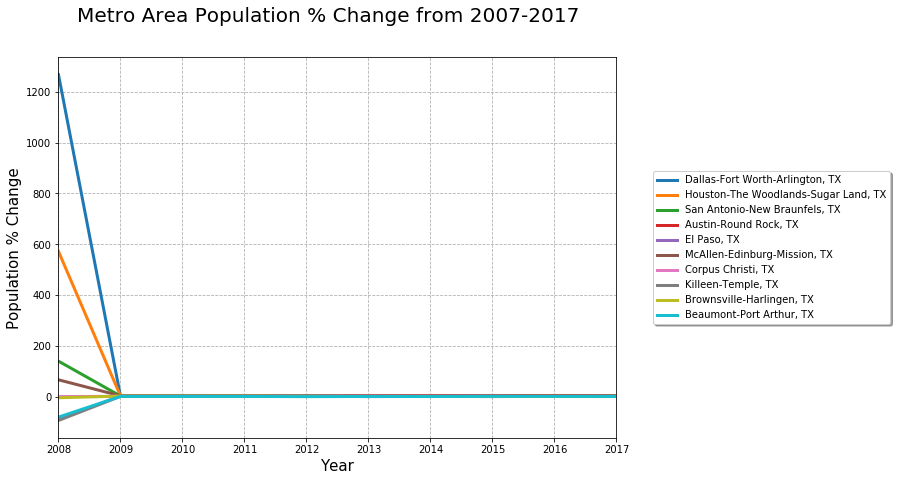

In [24]:
# Plot population percentage change
plt.figure(figsize = (10, 7))

for area in top_10_list:
    plot_df = top_10_final.loc[top_10_final["area"] == area]
    x = plot_df["year"]
    y = plot_df["population % change"]
    plt.plot(x, y, label = area, linewidth = 3)
    plt.xlim(plot_df.year.min(), plot_df.year.max(), 1)
    plt.legend(loc='right', bbox_to_anchor=(1.5, .5), shadow=True)

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Population % Change", fontsize = 15)
plt.suptitle("Metro Area Population % Change from 2007-2017", fontsize = 20)
plt.grid(linestyle = "--")
plt.savefig("images/population.png", bbox_inches='tight')
plt.show()

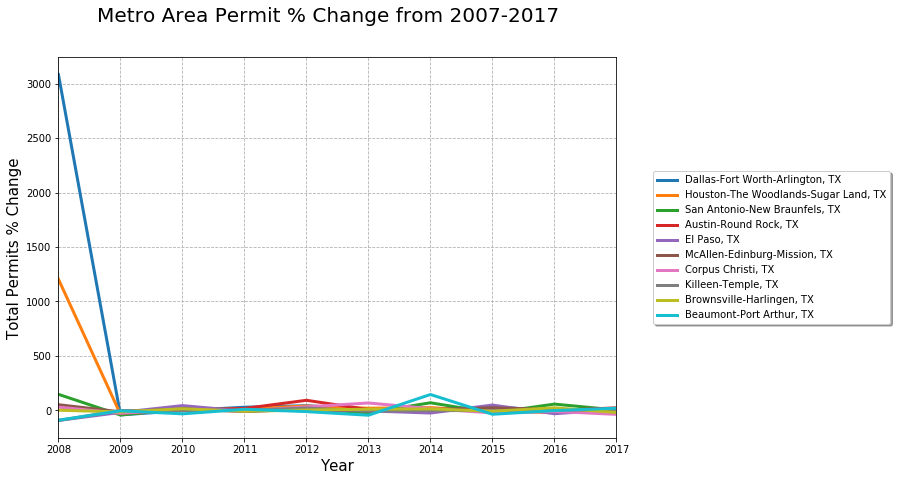

In [25]:
# Plot total permits percentage change
plt.figure(figsize = (10, 7))

for area in top_10_list:
    plot_df = top_10_final.loc[top_10_final["area"] == area]
    x = plot_df["year"]
    y = plot_df["total permits % change"]
    plt.plot(x, y, label = area, linewidth = 3)
    plt.xlim(plot_df.year.min(), plot_df.year.max(), 1)
    plt.legend(loc='right', bbox_to_anchor=(1.5, .5), shadow=True)

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Permits % Change", fontsize = 15)
plt.suptitle("Metro Area Permit % Change from 2007-2017", fontsize = 20)
plt.grid(linestyle = "--")
plt.savefig("images/permit.png", bbox_inches='tight')
plt.show()

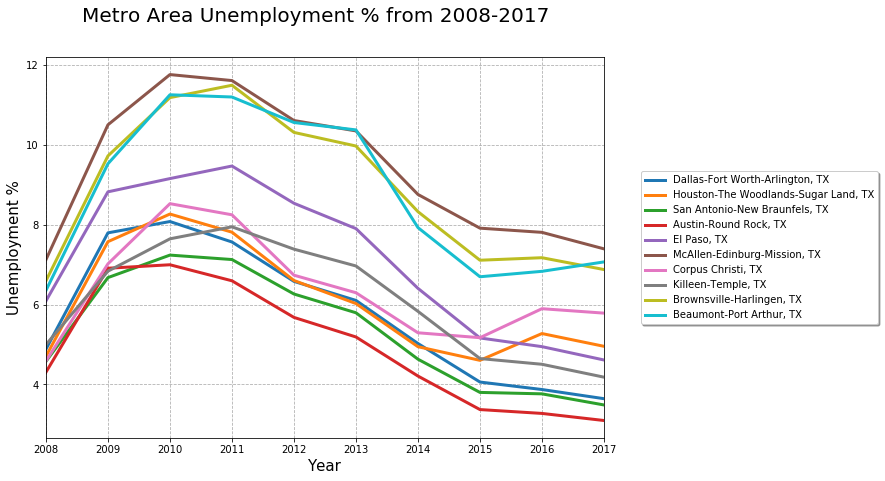

In [26]:
# Plot Unemployment change
plt.figure(figsize = (10, 7))

for area in top_10_list:
    plot_df = top_10_final.loc[top_10_final["area"] == area]
    x = plot_df["year"]
    y = plot_df["unemployment rate"]
    plt.plot(x, y, label = area, linewidth = 3)
    plt.xlim(plot_df.year.min(), plot_df.year.max(), 1)
    plt.legend(loc='right', bbox_to_anchor=(1.5, .5), shadow=True)

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Unemployment %", fontsize = 15)
plt.suptitle("Metro Area Unemployment % from 2008-2017", fontsize = 20)
plt.grid(linestyle = "--")
plt.savefig("images/unemployment.png", bbox_inches='tight')
plt.show()

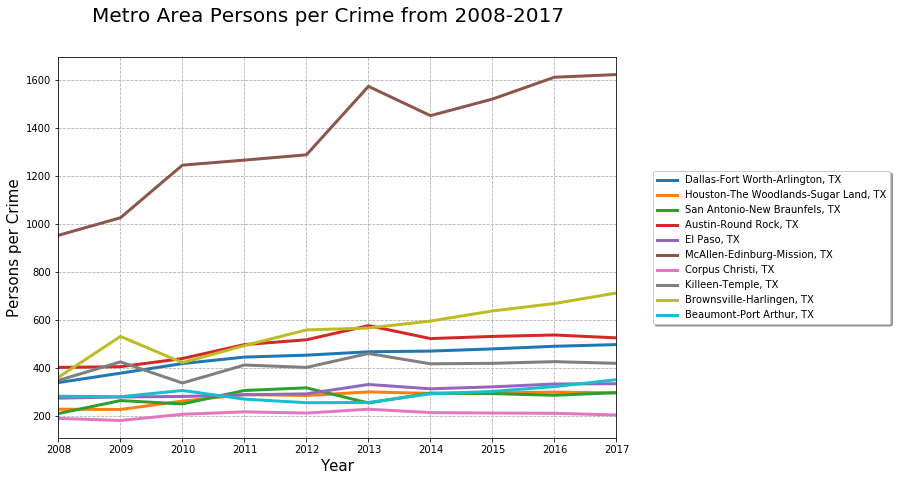

In [27]:
# Plot Crime Rate
plt.figure(figsize = (10, 7))

for area in top_10_list:
    plot_df = top_10_final.loc[top_10_final["area"] == area]
    x = plot_df["year"]
    y = plot_df["persons per crime"]
    plt.plot(x, y, label = area, linewidth = 3)
    plt.xlim(plot_df.year.min(), plot_df.year.max(), 1)
    plt.legend(loc='right', bbox_to_anchor=(1.5, .5), shadow=True)    

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Persons per Crime", fontsize = 15)
plt.suptitle("Metro Area Persons per Crime from 2008-2017", fontsize = 20)
plt.grid(linestyle = "--")
plt.savefig("images/crime.png", bbox_inches='tight')
plt.show()

In [28]:
top_10_final


,area,year,population,total permits,unemployment rate,crime,population % change,total permits % change,persons per crime,crime per persons,crime per every 1000 person
1,"Austin-Round Rock, TX",2008,1633870,11792,4.3054,4063.0,NaN,NaN,402.0,2.486734,2.486734
2,"Austin-Round Rock, TX",2009,1682338,8758,6.9079,4152.0,2.97,-25.73,405.0,2.467994,2.467994
3,"Austin-Round Rock, TX",2010,1716289,8786,6.9947,3906.0,2.02,0.32,439.0,2.275840,2.275840
4,"Austin-Round Rock, TX",2011,1780610,10239,6.5936,3586.0,3.75,16.54,497.0,2.013917,2.013917
5,"Austin-Round Rock, TX",2012,1834566,19595,5.6770,3546.0,3.03,91.38,517.0,1.932882,1.932882
6,"Austin-Round Rock, TX",2013,1883528,20865,5.1871,3272.0,2.67,6.48,576.0,1.737166,1.737166
7,"Austin-Round Rock, TX",2014,1942255,20276,4.2090,3721.0,3.12,-2.82,522.0,1.915814,1.915814
8,"Austin-Round Rock, TX",2015,2000784,22370,3.3701,3766.0,3.01,10.33,531.0,1.882262,1.882262
9,"Austin-Round Rock, TX",2016,2060558,21861,3.2735,3839.0,2.99,-2.28,537.0,1.863088,1.863088
10,"Austin-Round Rock, TX",2017,2115827,26700,3.0963,4028.0,2.68,22.14,525.0,1.903747,1.903747


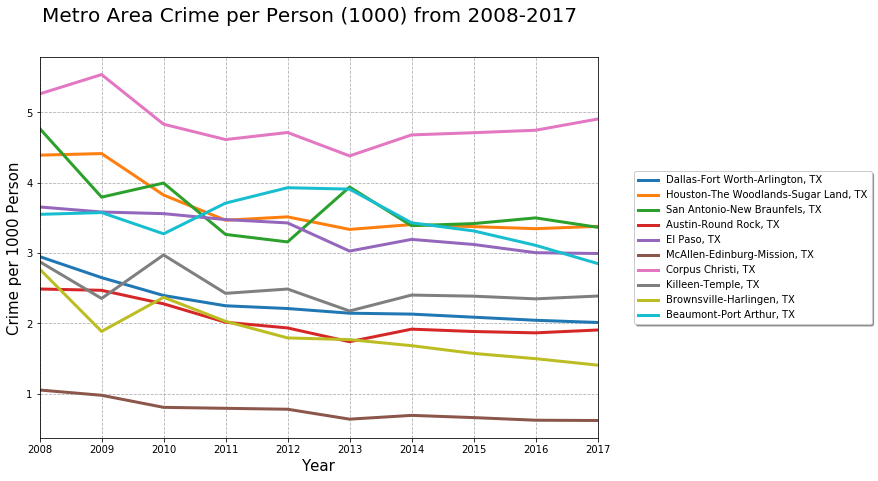

In [30]:
# Plot Crime Rate by Population (Every 1000 people)
plt.figure(figsize = (10, 7))

for area in top_10_list:
    plot_df = top_10_final.loc[top_10_final["area"] == area]
    x = plot_df["year"]
    y = plot_df["crime per every 1000 person"] 
    plt.plot(x, y, label = area, linewidth = 3)
    plt.xlim(plot_df.year.min(), plot_df.year.max(), 1)
    plt.legend(loc='right', bbox_to_anchor=(1.5, .5), shadow=True)    

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Crime per 1000 Person", fontsize = 15)
plt.suptitle("Metro Area Crime per Person (1000) from 2008-2017", fontsize = 20)
plt.grid(linestyle = "--")
plt.savefig("images/crimerate.png", bbox_inches='tight')
plt.show()